In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [48]:
def draw_matrix(ax, position, data, title, cell_width=0.5, cell_height=0.3, number_format="{:.0f}", text_color="black", font_size=10):
    """Draw a matrix on a given axes."""
    rows, cols = data.shape
    for i in range(rows):
        for j in range(cols):
            c = data[i, j]
            ax.text(
                position[0] + j * cell_width + cell_width/2,
                position[1] + i * cell_height + cell_height/2,
                number_format.format(c),
                va='center', ha='center',
                color=text_color,
                fontsize=font_size
            )

    # Set matrix title
    ax.text(position[0] + (cols * cell_width / 2), position[1] - 0.2, title, ha='center', fontsize=font_size)

    # Draw the grid
    for i in range(rows + 1):
        ax.plot(
            [position[0], position[0] + cols * cell_width],
            [position[1] + i * cell_height, position[1] + i * cell_height],
            color="black"
        )

    for i in range(cols + 1):
        ax.plot(
            [position[0] + i * cell_width, position[0] + i * cell_width],
            [position[1], position[1] + rows * cell_height],
            color="black"
        )

def draw_output_matrix(ax, position, input_data, kernel_data, output_data, cell_width=1.5, cell_height=0.3, font_size=10):
    """Draw the output matrix with convolution computation."""
    rows, cols = output_data.shape
    for i in range(rows):
        for j in range(cols):
            value = output_data[i, j]
            computation_str = ""
            for k in range(kernel_data.shape[0]):
                for l in range(kernel_data.shape[1]):
                    input_val = input_data[i+k, j+l]
                    kernel_val = kernel_data[k, l]
                    sign = "+" if kernel_val >= 0 else ""
                    computation_str += "{}{}*{} ".format(sign, kernel_val, input_val)
            computation_str = computation_str.strip() + "={}".format(value)
            ax.text(position[0] + j * cell_width + cell_width/2,
                    position[1] + i * cell_height + cell_height/2,
                    computation_str,
                    va='center', ha='center',
                    fontsize=font_size,
                    color="black")

    # Set matrix title
    ax.text(position[0] + (cols * cell_width / 2), position[1] - 0.2, "Output", ha='center', fontsize=font_size)

    # Draw the grid
    for i in range(rows + 1):
        ax.plot(
            [position[0], position[0] + cols * cell_width],
            [position[1] + i * cell_height, position[1] + i * cell_height],
            color="black"
        )

    for i in range(cols + 1):
        ax.plot(
            [position[0] + i * cell_width, position[0] + i * cell_width],
            [position[1], position[1] + rows * cell_height],
            color="black"
        )

def draw_convolution_diagram(input_data, kernel_data, output_data, cell_height=0.5, cell_width=0.5, output_cell_width=0.5):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Determine the vertical center
    vertical_center = 2.5  # Static vertical center

    # Calculate positions based on provided cell sizes
    input_x = 1
    kernel_x = input_x + input_data.shape[1] * cell_width + 1.5  # 1.5 units space between input and kernel
    output_x = kernel_x + kernel_data.shape[1] * cell_width + 1.5  # 1.5 units space between kernel and output

    # Draw input matrix
    draw_matrix(ax, (input_x, vertical_center - input_data.shape[0] * cell_height / 2), input_data, "Input", cell_width, cell_height)

    # Draw kernel matrix
    draw_matrix(ax, (kernel_x, vertical_center - kernel_data.shape[0] * cell_height / 2), kernel_data, "Kernel", cell_width, cell_height)

    # Draw output matrix with convolution computation
    draw_output_matrix(ax, (output_x, vertical_center - output_data.shape[0] * cell_height / 2), input_data, kernel_data, output_data, output_cell_width, cell_height)

    # Calculate arrow start and end points
    arrow_start_1 = input_x + input_data.shape[1] * cell_width + 0.5  # 0.5 units space after input matrix
    arrow_end_1 = kernel_x - 0.5  # 0.5 units space before kernel matrix
    arrow_start_2 = kernel_x + kernel_data.shape[1] * cell_width + 0.5  # 0.5 units space after kernel matrix
    arrow_end_2 = output_x - 0.5  # 0.5 units space before output matrix

    # Draw arrows
    ax.annotate("", xy=(arrow_end_1, vertical_center), xytext=(arrow_start_1, vertical_center),
                arrowprops=dict(arrowstyle="->", lw=1.5, mutation_scale=15))
    ax.annotate("", xy=(arrow_end_2, vertical_center), xytext=(arrow_start_2, vertical_center),
                arrowprops=dict(arrowstyle="->", lw=1.5, mutation_scale=15))

    # Set the convolution operation label
    ax.text((arrow_start_1 + arrow_end_1) / 2, vertical_center, "*", va='center', ha='center', fontsize=15)
    ax.text((arrow_start_2 + arrow_end_2) / 2, vertical_center, "=", va='center', ha='center', fontsize=15)

    ax.axis('off')
    plt.tight_layout()

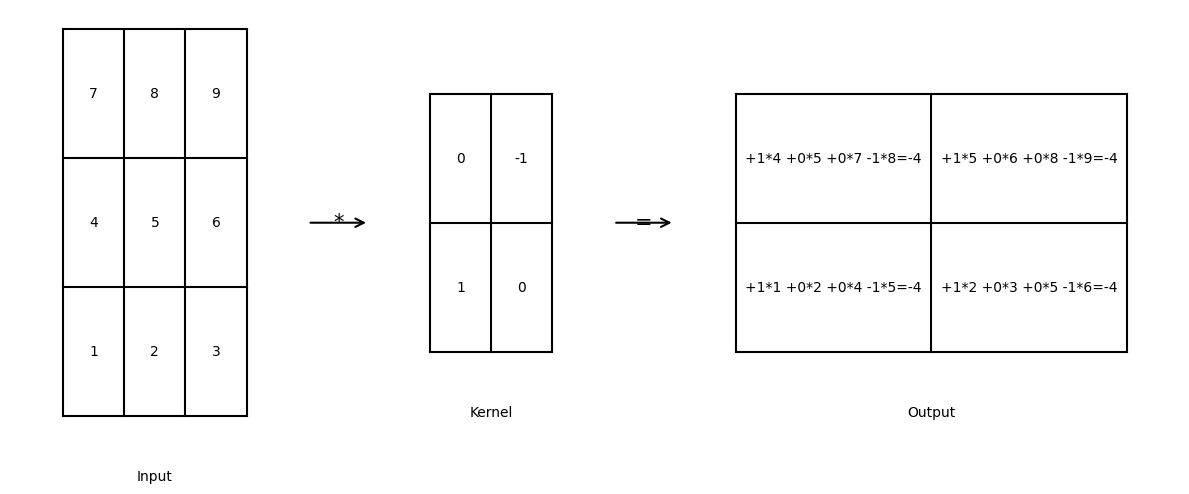

In [51]:
# Sample data for demonstration
input_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel_data = np.array([[1, 0], [0, -1]])
output_data = np.array([[-4, -4], [-4, -4]])

# Demonstrating with some sample sizes
draw_convolution_diagram(input_data, kernel_data, output_data, cell_height=0.4, cell_width=0.5, output_cell_width=1.6)
name = "convolution.pdf"
save_path = f"/content/gdrive/MyDrive/Colab Notebooks/2023/Tesi/Draws/{name}"
plt.savefig(save_path, format='pdf', bbox_inches='tight')

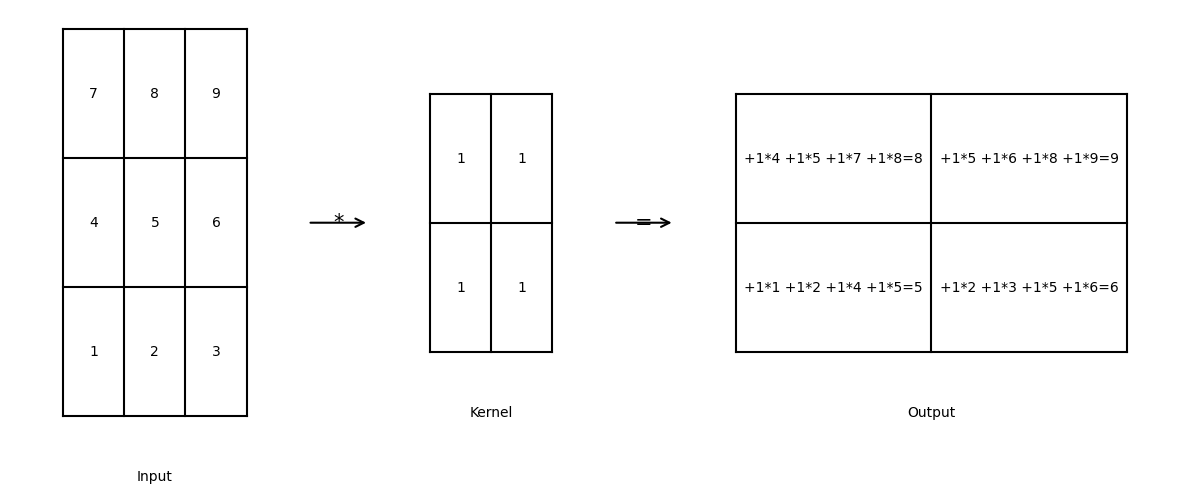

In [52]:
# Sample data for demonstration
input_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel_data = np.array([[1, 1], [1, 1]])
output_data = np.array([[5, 6], [8, 9]])

# Demonstrating with some sample sizes
draw_convolution_diagram(input_data, kernel_data, output_data, cell_height=0.4, cell_width=0.5, output_cell_width=1.6)
name = "pooling.pdf"
save_path = f"/content/gdrive/MyDrive/Colab Notebooks/2023/Tesi/Draws/{name}"
plt.savefig(save_path, format='pdf', bbox_inches='tight')